# Model CNN pour classification

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

## Dataset

In [2]:
img_height = 32
img_width = 32
batch_size = 32

train_data = tf.keras.utils.image_dataset_from_directory(
    '../Data/gems_images/train',
    validation_split=0.2,          
    subset="training",
    seed=42,                       
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_data = tf.keras.utils.image_dataset_from_directory(
    '../Data/gems_images/train',
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '../Data/gems_images/test',
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 2856 files belonging to 87 classes.
Using 2285 files for training.
Found 2856 files belonging to 87 classes.
Using 571 files for validation.
Found 363 files belonging to 87 classes.


## Data visualisation

Class names: ['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite',

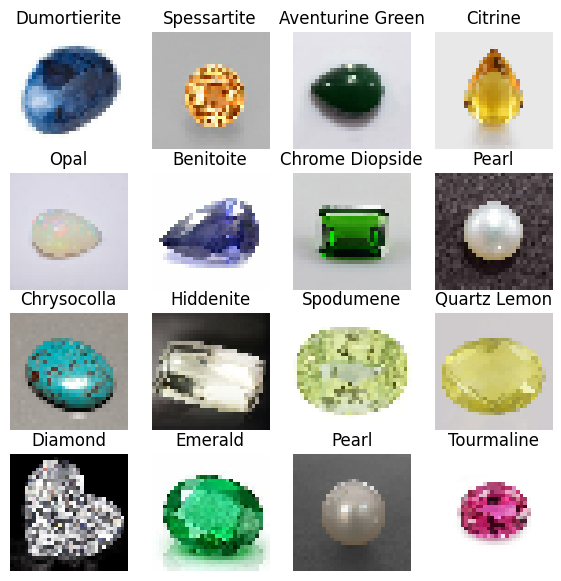

In [3]:
class_names = train_data.class_names
print("Class names:", class_names)
# Data visualisation
plt.figure(figsize=(7, 7))
for images, labels in train_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

## creation du model

In [4]:
num_classes = len(class_names)

modelCNN = tf.keras.Sequential([

    # Normalize
    tf.keras.layers.Rescaling(1./255),

    # --- Block 1 ---
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),

    # --- Block 2 ---
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    # --- Block 3 ---
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.4),

    # Flatten + Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    # Output layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [5]:
modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = modelCNN.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)

Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.0748 - loss: 4.5862 - val_accuracy: 0.0210 - val_loss: 5.1362
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1720 - loss: 3.3689 - val_accuracy: 0.0123 - val_loss: 6.5215
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.2455 - loss: 2.8627 - val_accuracy: 0.0105 - val_loss: 6.4895
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3077 - loss: 2.5098 - val_accuracy: 0.0455 - val_loss: 4.6912
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3676 - loss: 2.2349 - val_accuracy: 0.1016 - val_loss: 3.8404
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3917 - loss: 2.0940 - val_accuracy: 0.1296 - val_loss: 3.4027
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4354 - loss: 1.9485 - val_accuracy: 0.2627 - val_loss: 2.7574
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4608 - loss: 1.8321 - val_accuracy: 0.3678 - v

## Plot training curves

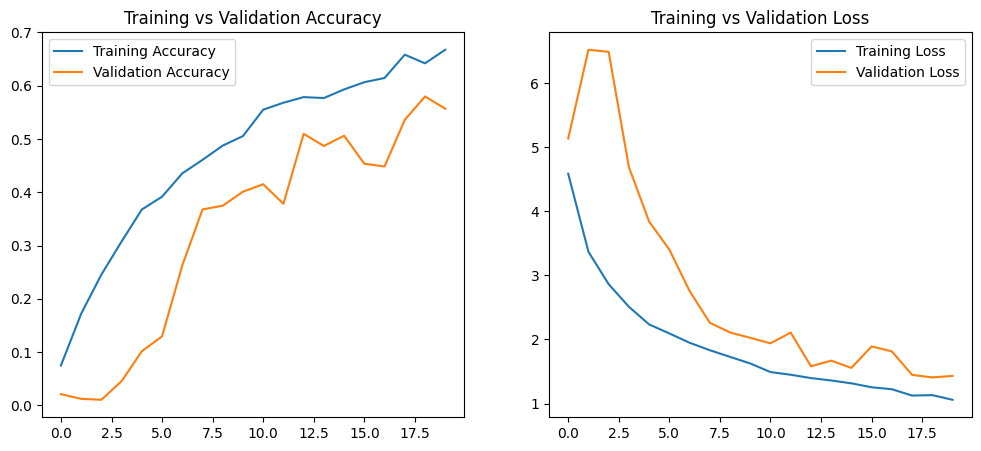

In [7]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [8]:
modelCNN.fit(test_data,verbose=2)

12/12 - 1s - 59ms/step - accuracy: 0.4408 - loss: 1.8391


In [9]:
modelCNN.evaluate(test_data,verbose=2)

12/12 - 0s - 15ms/step - accuracy: 0.4380 - loss: 1.9064


[1.9063664674758911, 0.43801653385162354]

In [10]:
for images, labels in test_data.take(1):
    prediction = modelCNN.predict(images)
    predicted_labels = np.argmax(prediction, axis=1)
    for i in range(10):
        print(f"Image {i+1}: True label: {class_names[labels[i]]}, Predicted label: {class_names[predicted_labels[i]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Image 1: True label: Emerald, Predicted label: Emerald
Image 2: True label: Tanzanite, Predicted label: Sapphire Purple
Image 3: True label: Jasper, Predicted label: Pyrope
Image 4: True label: Zoisite, Predicted label: Serpentine
Image 5: True label: Moonstone, Predicted label: Moonstone
Image 6: True label: Spinel, Predicted label: Spinel
Image 7: True label: Alexandrite, Predicted label: Benitoite
Image 8: True label: Tourmaline, Predicted label: Tourmaline
Image 9: True label: Chalcedony, Predicted label: Chalcedony
Image 10: True label: Danburite, Predicted label: Sapphire Purple
